# LSN Exercise 1

The aim of this first exercise is to review some important **elements of statistical theory**, such as:
- The extimation of uncertainties;
- The use of likelihood tests;
- The CLT (*Central Limit Theorem*);

We will also perform our first Monte Carlo simulation: the *Buffon's experiment*.

In [1]:
# Settings and libraries:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
SCALE = 6
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

# Input functions:

def Read(filename):
    with open(filename) as f:
        vector = [float(i) for i in f.read().splitlines()]
    return vector

## 1.1 Statistical uncertainties

We are going to test a random number generator (i.e. *how much* the *pseudo-random numbers* generated are close to real random numbers) by estimating the *first two cumulants* of the uniform distribution implemented by our generator and comparing them with the theoretical one:

$$ c_1\equiv m_1\equiv \langle r \rangle = \int_\Omega r\; \mathrm{d}r = \frac{1}{2} \qquad c_2\equiv m_2 - m_1^2\equiv\sigma_r^2 = \int_\Omega (r - \langle r \rangle)^2 \; \mathrm{d}r = \frac{1}{12} \approx 0,083 $$

with $ r \sim \mathscr U(0,1) $. To do this, we look at running our generator as an experiment of rolling a "dice": if the dice is not loaded we expect that, after a large number of throws, the average of the results should be close to the expected value and will tend to become closer to the expected value as more trials are performed (this is the so called *law of large numbers*). To estimate uncertainties we make use of the *blocking method*, very useful when performing Monte Carlo simulations: instead of "throwing the dice" $ N = 10000 $ times, we throw it $ s = 100 $ times for $ n = 100 $ times, i.e. *we divide our simulation in $n$ experiment of length $s$* ($ N = ns $). Results for 100 throws over 100 simulations are shown in the following plots.


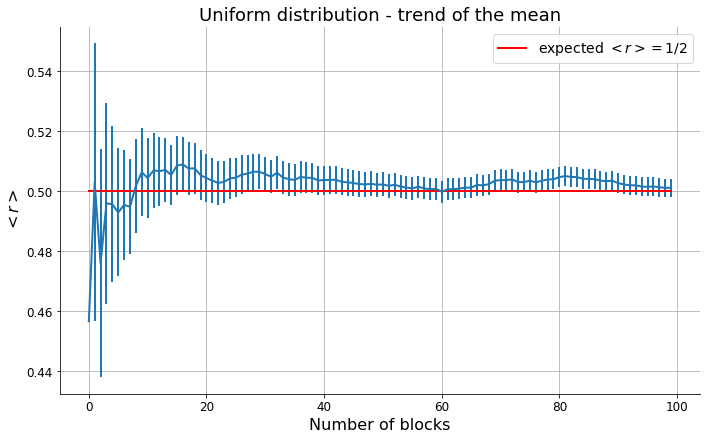

In [2]:
Means = Read("Unif/Mean.txt")
Errors = Read("Unif/Mean_error.txt")

t = np.arange(len(Means))
expected = [0.5 for i in t]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(t, Means, yerr=Errors)
plt.title("Uniform distribution - trend of the mean")
plt.xlabel("Number of blocks")
plt.ylabel("$ <r> $")
plt.plot(t, expected,'r',label="expected $ <r>=1/2 $")
plt.legend()
plt.grid()

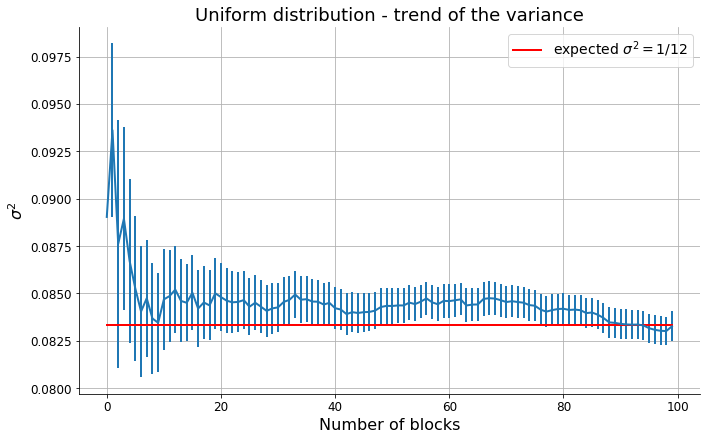

In [3]:
Means = Read("Unif/Var.txt")
Errors = Read("Unif/Var_error.txt")

expected = [1/12 for i in t]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(t, Means, yerr=Errors)
plt.title("Uniform distribution - trend of the variance")
plt.xlabel("Number of blocks")
plt.ylabel("$ \sigma^2 $")
plt.plot(t, expected, 'r', label="expected $ \sigma^2 = 1/12 $")
plt.legend()
plt.grid()

From the plots above we see a nice statistical convergence to the expected values, with error bars covering the red lines. Error bars are computed progressively: in each block we estimate the mean and the square of this mean, then we evaluate the error as the square root of the variance of these mean values, considering more and more blocks progressively.

As a validation of our previous results we perform a $ \chi^2 $ likelihood test, drawing $ 10000 $ numbers in $ 100 $ simulations, dividing the interval $ [0,1) $ in $ 100 $ subintervals and looking in which subinterval the radom number goes. Computing the sum of the square differences between observed values and theoretical ones weighted over the theoretical values, we are expected to obtain $ \chi^2 \sim 100 $. The following scatter plot validate this fact: the red dots are evenly distributed around the green line.

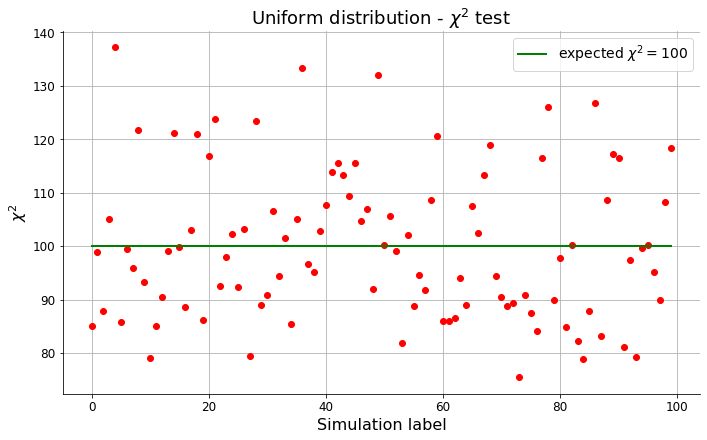

In [4]:
Chi2 = Read("Unif/Chi2.txt")

x = [int(i) for i in range(len(Chi2))]
expected = [100 for i in x]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x, Chi2, "ro")
plt.title("Uniform distribution - $\chi^2$ test")
plt.xlabel("Simulation label")
plt.ylabel("$ \chi^2 $")
plt.plot(x, expected, 'g', label="expected $ \chi^2 = 100 $")
plt.legend()
plt.grid()

## 1.2 Central Limit Theorem (CLT)

In this section we are going to test the **CLT** for *standard*, *exponential* and *Cauchy-Lorentz distributions*. Using our random number generator with specific methods implemented to draw random numbers (*inverese cumulative* and *Box-Muller*) we study the distribution of the *sum of random variables* of the same distribution. The cases $ N = 1, 2, 10, 100 $ are studied, drawing $ 10000 $ numbers for each one, to show the *convergence to the limiting distribution*. The $ N = 100 $ case is accompanied with:

- *The expected distribution given by the CLT for the standrad and exponential sampling*: another standard distribution with the same mean value and standard deviation reduced by a factor $ \sqrt{100} = 10 $. Using fit methods from `scipy.stats` library, we estimate the best values for the mean and standard deviation of the simulated distributions;

- a Cauchy-Lorentz distribution with center and scale given by the best values obtained from a fit over the simulated distribution. In this case we only expect another Cauchy-Lorentz distribution, but we don't know the theoretical values.

-----------------------------------------------------------------------------------
The best values for the continuous normal pdf which best fit data with N = 100 are:

mean =  0.0008
stdev =  0.1
-----------------------------------------------------------------------------------


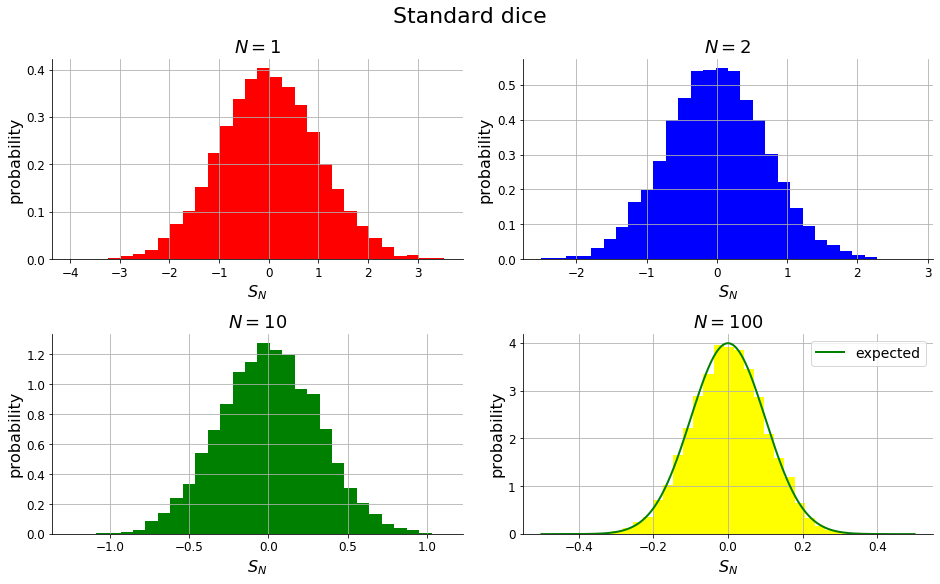

In [5]:
Gauss1 = Read("Dice/Gauss_1.txt")
Gauss2 = Read("Dice/Gauss_2.txt")
Gauss3 = Read("Dice/Gauss_3.txt")
Gauss4 = Read("Dice/Gauss_4.txt")

SCALE = 8
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

n_bin = 30

fig, ((G1, G2), (G3, G4)) = plt.subplots(2, 2, constrained_layout=True, figsize=FIG_SIZE)
fig.suptitle("Standard dice", fontsize=22)

G1.hist(Gauss1, n_bin, density=True, facecolor='red')
G1.set_title("$ N = 1 $")

G2.hist(Gauss2, n_bin, density=True, facecolor='blue')
G2.set_title("$ N = 2 $")

G3.hist(Gauss3, n_bin, density=True, facecolor='green')
G3.set_title("$ N = 10 $")

# Gauss pdf -----------------------------------------------------------
def Gauss(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2/(2*sigma**2))
# ---------------------------------------------------------------------

(mu, sigma) = stat.norm.fit(Gauss4)     # Normal fit parameters
print("-----------------------------------------------------------------------------------")
print("The best values for the continuous normal pdf which best fit data with N = 100 are:")
print()
print("mean = ", round(mu,4))
print("stdev = ", round(sigma,4))
print("-----------------------------------------------------------------------------------")

x = np.linspace(-0.5,0.5,10000)
Expected = [Gauss(i,0,1/10) for i in x] # We expect a normal pdf of center 0 and variance 1/sqrt(100)

G4.hist(Gauss4, n_bin, density=True, facecolor='yellow')
G4.plot(x, Expected, "green", label='expected')
G4.set_title("$ N = 100 $")
G4.legend()

for i in fig.get_axes():
    i.set_xlabel("$S_N$")
    i.set_ylabel("probability")
    i.grid(True)

-----------------------------------------------------------------------------------
The best values for the continuous normal pdf which best fit data with N = 100 are:

mean =  0.999
stdev =  0.0993
-----------------------------------------------------------------------------------


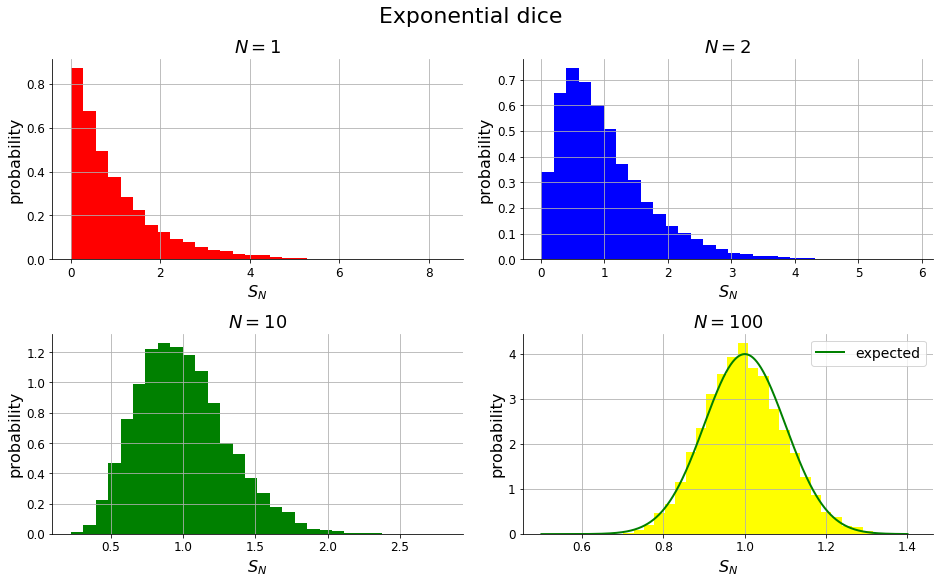

In [6]:
Exp1 = Read("Dice/Exp_1.txt")
Exp2 = Read("Dice/Exp_2.txt")
Exp3 = Read("Dice/Exp_3.txt")
Exp4 = Read("Dice/Exp_4.txt")

fig, ((E1, E2), (E3, E4)) = plt.subplots(2, 2, constrained_layout=True, figsize=FIG_SIZE)
fig.suptitle("Exponential dice", fontsize=22)

E1.hist(Exp1, n_bin, density=True, facecolor='red')
E1.set_title("$ N = 1 $")

E2.hist(Exp2, n_bin, density=True, facecolor='blue')
E2.set_title("$ N = 2 $")

E3.hist(Exp3, n_bin, density=True, facecolor='green')
E3.set_title("$ N = 10 $")

(mu, sigma) = stat.norm.fit(Exp4)       # Normal fit parameters
print("-----------------------------------------------------------------------------------")
print("The best values for the continuous normal pdf which best fit data with N = 100 are:")
print()
print("mean = ", round(mu,4))
print("stdev = ", round(sigma,4))
print("-----------------------------------------------------------------------------------")

x = np.linspace(0.5,1.4,10000)
Expected = [Gauss(i,1,1/10) for i in x] # We expect a normal pdf of center 0 and variance 1/sqrt(100)

E4.hist(Exp4, n_bin, density=True, facecolor='yellow')
E4.plot(x, Expected, "green", label='expected')
E4.set_title("$ N = 100 $")
E4.legend()

for i in fig.get_axes():
    i.set_xlabel("$ S_N $")
    i.set_ylabel("probability")
    i.grid(True)

------------------------------------------------------------------------------------------
The best values for the continuos Cauchy-Lorentz pdf which best fit data with N = 100 are:

center =  -0.0012
scale =  1.0273
------------------------------------------------------------------------------------------


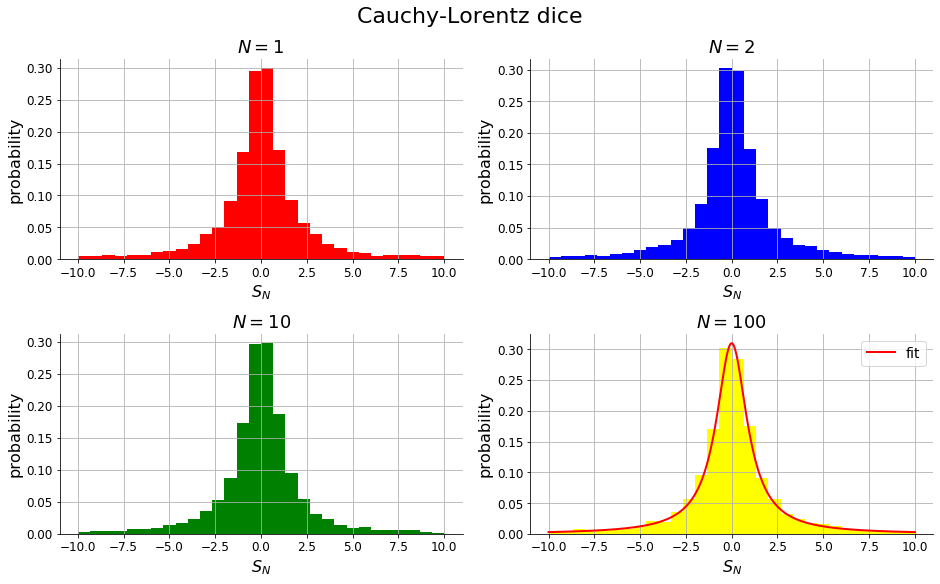

In [7]:
Lorentz1 = Read("Dice/Lorentz_1.txt")
Lorentz2 = Read("Dice/Lorentz_2.txt")
Lorentz3 = Read("Dice/Lorentz_3.txt")
Lorentz4 = Read("Dice/Lorentz_4.txt")

fig, ((L1, L2), (L3, L4)) = plt.subplots(2, 2, constrained_layout=True, figsize=FIG_SIZE)
fig.suptitle("Cauchy-Lorentz dice", fontsize=22)

L1.hist(Lorentz1, n_bin, density=True, facecolor='red', range=(-10,10))
L1.set_title("$ N = 1 $")

L2.hist(Lorentz2, n_bin, density=True, facecolor='blue', range=(-10,10))
L2.set_title("$ N = 2 $")

L3.hist(Lorentz3, n_bin, density=True, facecolor='green', range=(-10,10))
L3.set_title("$ N = 10 $")

# Lorentz pdf -------------------------------------
def Lorentz(x, center, scale):
    return scale/(np.pi*(((x-center)**2)+scale**2))
# -------------------------------------------------

(center, scale) = stat.cauchy.fit(Lorentz4)   # Cauchy fit parameters
print("------------------------------------------------------------------------------------------")
print("The best values for the continuos Cauchy-Lorentz pdf which best fit data with N = 100 are:")
print()
print("center = ", round(center,4))
print("scale = ", round(scale,4))
print("------------------------------------------------------------------------------------------")

x = np.linspace(-10,10,len(Lorentz4))

fit = [Lorentz(i,center,scale) for i in x]    # Cauchy fit

L4.hist(Lorentz4, n_bin, density=True, facecolor='yellow', range=(-10,10))
L4.plot(x, fit, "red", label='fit')
L4.set_title("$ N = 100 $")
L4.legend()

for i in fig.get_axes():
    i.set_xlabel("$ S_N $")
    i.set_ylabel("probability")
    i.grid(True)

Both the normal distribution and the exponential one gradually converge to the expected distribution, with mean value and standard deviation in agreement with the fit estimation. The Cauchy-Lorentz distribution converge to another distribution of the same type, with center and scale in principle unknown, but estimated implementing another fit.

**A remark:** The Cauchy-Lorentz distribution is a heavy-tailed distribution: the probability of events in the tails of the distribution are greater than what would be given by a Normal distribution. For this reason we have decided to reject all datas outside the interval $ [-10,10] $, otherwise the distribution would not have been visualized nicely (the $ S_N $ variable may take also values far distant from the center of the distribution).

## 1.3 Buffon's experiment

We simulate *Buffon's experiment* to obtain an estimation of the true value of $\pi$. As experimental setting we use $L=4.5$ and $d=7.0$, respectively the length of the needle and the distance between parallel lines on the ground. We remeber that from a theoretical analysis it's possible to get:

$$ \pi = \frac{2L}{Pd} $$

This expression can be obtained if we make the hypothesis that: 
- the orientation of the needle $\theta$ respect to the nearest line is a uniform random variable distributed in the range $[0,\pi/2]$;
- the position of the needle $x$ respect to the nearest line is a uniform random variable distributed in the range $[0,d/2]$;
- $x$ and $\theta$ are indipendent random variables.

from these hypothesis the condition for the needle to intersect one line is:

$$ x \le \frac{L}{2} \sin \theta $$

Using our random number generator we sample $ x \sim \mathscr U(0,d/2) $ and $ \theta \sim \mathscr U(0,\pi/2) $ and we check for the condition above to evaluate:

$$ \pi = \frac{2L}{d} \frac{N}{N_{hit}} $$

As in the previous simulations we perform $100$ experiments, throwing the needle $ N = 1000 $ times in each block and estimating uncertainties using data-blocking. As the following plot shows, *the method give us a good estimation of $ \pi $ up to the second decimal place*.

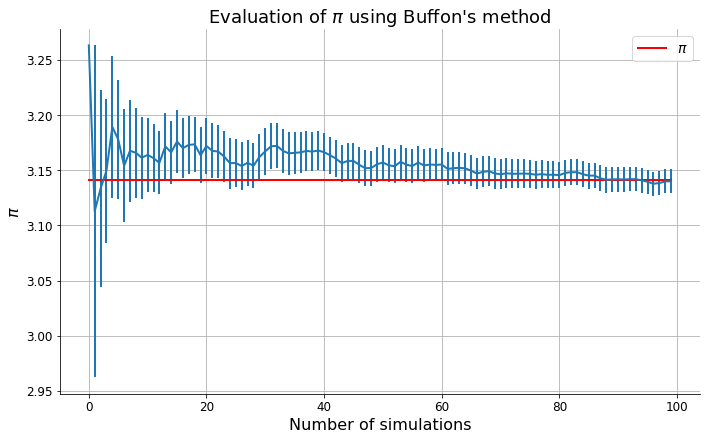

In [8]:
Pi = Read("Pi/Pi.txt")
Pi_err = Read("Pi/Pi_error.txt")

SCALE = 6
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

x = np.arange(len(Pi))
expected = [np.pi for i in x]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(x, Pi, yerr=Pi_err)
plt.title("Evaluation of $\pi$ using Buffon's method")
plt.xlabel("Number of simulations")
plt.ylabel("$ \pi $")
plt.plot(x, expected,'r',label="$ \pi $")
plt.legend()
plt.grid(True)